In [2]:
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from citipy import citipy
import seaborn as sns
import scipy
import requests
from pprint import pprint
import random
import json
from pprint import pprint
import logging
import apikey
import pyowm

In [3]:
#define how the coordinates are selected
with open('city.list.json') as d:
    data = json.load(d)

print(data[0])

{'id': 707860, 'name': 'Hurzuf', 'country': 'UA', 'coord': {'lon': 34.283333, 'lat': 44.549999}}


In [4]:
# Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#what made sense to me:
# cities = np.random.shuffle(data)
# cities = data[:500]

#what the assignment wants


In [5]:
print(apikey.consumer_key)

3be3b67cc390dc727baad817a3e5bde9


In [8]:
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.                   
logging.basicConfig(filename='city_queries.log', filemode = 'w', level=logging.DEBUG)

# HW Question: What is Citipy for and why use it in conjunction with the OpenWeatherMap API? 
# AB answer: to assist in the identification of more statistically-accurately
#randomized latitude and longitudes without sacrificing accuracy of city_data being fed to OWM

# HW Question: How would you do so? 
# AB Answer: Use a float(neg or decimal-ed numbers)-allowing random number generator from numpy
    # to select numbers from -90 thru 90 to serve as a latitude and -180 to 180 for a latitude
    # then append these to a cities "set" -- which only accepts non-duplicate entries. This way we have truly 'unique'
    # i.e. non-repeating/duplicate and truly 'random' not based on a list of cities that may be clustered on the same 
    # continents or areas


city_info = []
cities = set()
while (len(city_info) < 500):
    lat = random.uniform(-90, 90)
    long = random.uniform(-180, 180)
    city = citipy.nearest_city(lat, long)
    #make sure don't process same city twice
    if city in cities:
        continue
    cities.add(city)
    #build the url to query for each location to perform a weather check on each of the cities 
    #using a series of successive API calls.
    url = "http://api.openweathermap.org/data/2.5/weather"
    query_params = {
        'appid': apikey.consumer_key,
        'q': str(city.city_name) + ',' + str(city.country_code),
        'units': 'imperial'}
    weather_response = requests.get(url, params=query_params)
    #restart loop with different coordinates if a 404 response is returned
    if weather_response.status_code == 404:
        print ('404 error')
        continue
    weather_json = weather_response.json()
    logging.info(' City Info: ' + str(len(city_info)) + ', ' + city.city_name + ', ' + 'requested URL: ' + 'weather_response')
    city_info.append(weather_json)
    print('processing ' + str(len(city_info)))    

processing 1
processing 2
processing 3
processing 4
processing 5
processing 6
processing 7
processing 8
processing 9
processing 10
processing 11
processing 12
processing 13
processing 14
processing 15
processing 16
processing 17
processing 18
404 error
processing 19
processing 20
processing 21
processing 22
processing 23
404 error
processing 24
processing 25
processing 26
processing 27
processing 28
processing 29
processing 30
processing 31
processing 32
processing 33
processing 34
processing 35
processing 36
processing 37
processing 38
processing 39
processing 40
processing 41
processing 42
processing 43
processing 44
processing 45
processing 46
processing 47
processing 48
processing 49
processing 50
processing 51
processing 52
processing 53
404 error
processing 54
processing 55
processing 56
processing 57
processing 58
processing 59
processing 60
processing 61
processing 62
processing 63
processing 64
processing 65
processing 66
404 error
404 error
404 error
processing 67
processing 

In [9]:
#Save both a CSV of all data retrieved
city_data = json_normalize(city_info)
city_data.to_csv('city_data.csv')
city_data.head()

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,80,200,-23.12,-134.97,1537731553,4030556,1021.81,100,1021.81,...,NaN,0.0035,1537714045,1537757798,NaN,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...",69.0035,NaN,12.88
1,stations,44,200,46.54,138.33,1537731554,2015852,1017.19,100,1017.19,...,NaN,0.0031,1537648509,1537692112,NaN,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...",11.5035,NaN,8.41
2,stations,20,200,39.52,-104.76,1537729080,5434006,NaN,3,1018.00,...,546.0,0.0066,1537706907,1537750380,1.0,16093.0,"[{'id': 801, 'main': 'Clouds', 'description': ...",156.5040,NaN,3.15
3,stations,0,200,-15.94,-5.72,1537731554,3370903,1031.30,99,1031.30,...,NaN,0.0032,1537683070,1537726742,NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",116.0040,NaN,15.68
4,stations,0,200,-4.49,-38.60,1537731555,3393766,1015.08,67,1015.08,...,NaN,0.0036,1537690985,1537734595,NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",77.5035,NaN,11.54


In [10]:
cut_city_data = city_data.filter(['coord.lat','coord.lon','main.temp', 'main.humidity', 'clouds.all', 'wind.speed'], axis=1)
cut_city_data = cut_city_data.rename(columns={"coord.lat":"Latitude", "coord.lon": "Longitude", "main.temp": "Temperature (F)", "main.humidity": "Humidity (%)","clouds.all":"Cloudiness (%)","wind.speed":"Wind Speed (MpH)"})
cut_city_data.head()

,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MpH)
0,-23.12,-134.97,66.14,100,80,12.88
1,46.54,138.33,53.27,100,44,8.41
2,39.52,-104.76,83.71,3,20,3.15
3,-15.94,-5.72,68.12,99,0,15.68
4,-4.49,-38.60,79.37,67,0,11.54


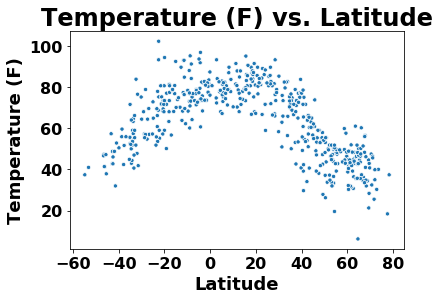

In [13]:
# Temperature (F) vs. Latitudesns.plt.scatterplot(x = 'Latitude',
axs = sns.scatterplot(x = 'Latitude',
            y = 'Temperature (F)',
            data = cut_city_data,
            size = 7,
            legend = False);
plt.title('Temperature (F) vs. Latitude',fontsize=24,fontweight='bold')
plt.xlabel('Latitude',fontsize=18,fontweight='bold')
plt.ylabel('Temperature (F)',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure = plt.gcf()
plt.show()
sent_figure.savefig('temp_v_lat.png')

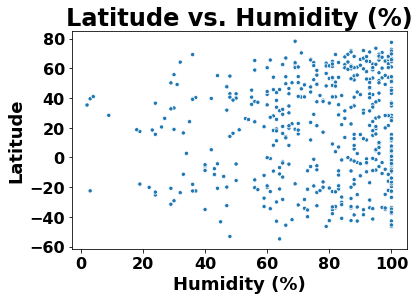

In [17]:
# * Humidity (%) vs. Latitude
axs = sns.scatterplot(x = 'Humidity (%)',
            y = 'Latitude',
            data = cut_city_data,
            size = 7,
            legend = False);
plt.title('Latitude vs. Humidity (%)',fontsize=24,fontweight='bold')
plt.xlabel('Humidity (%)',fontsize=18,fontweight='bold')
plt.ylabel('Latitude',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure = plt.gcf()
plt.show()
sent_figure.savefig('humidity_v_lat.png')

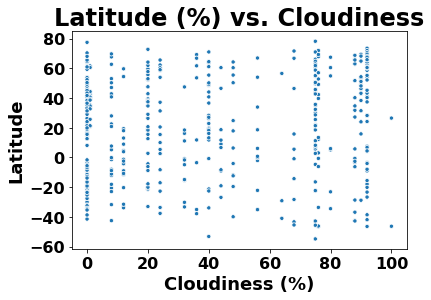

In [23]:
# * Cloudiness (%) vs. Latitude
axs = sns.scatterplot(x = 'Cloudiness (%)',
            y = 'Latitude',
            data = cut_city_data,
            size = 7,
            legend = False);
plt.title('Latitude (%) vs. Cloudiness',fontsize=24,fontweight='bold')
plt.xlabel('Cloudiness (%)',fontsize=18,fontweight='bold')
plt.ylabel('Latitude',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure = plt.gcf()
plt.show()
sent_figure.savefig('cloudiness_v_lat.png')

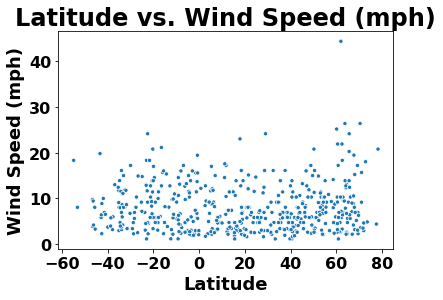

In [24]:
# * Wind Speed (mph) vs. Latitude
axs = sns.scatterplot(x = 'Latitude',
            y = 'Wind Speed (MpH)',
            data = cut_city_data,
            size = 7,
            legend = False);
plt.title('Latitude vs. Wind Speed (mph)',fontsize=24,fontweight='bold')
plt.xlabel('Latitude',fontsize=18,fontweight='bold')
plt.ylabel('Wind Speed (mph)',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
sent_figure = plt.gcf()
plt.show()
sent_figure.savefig('wind_speed_v_lat.png')
#  and png images for each scatter plot.